In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Python Practice'

In [4]:
rd = pd.read_csv("C:\Python Practice\hiv prevalence.csv")


In [5]:
rd

,Estimated HIV Prevalence% - (Ages 15-49),1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Saint Eustatius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import pandas as pd
import pycountry_convert as pc


sheet = "hiv prevalence.xlsx"
df = pd.read_excel(sheet)

# countries_list, continents_list

#listing the countries that are present in the dataset and assigning to data frame
countries_list =  list(df['Estimated HIV Prevalence% - (Ages 15-49)'])
listt = len(countries_list)
continents_list = []

#Giving continent to each country and if the continent is unavailable it is given as 'not found'
for k in range (listt):
    try:      
        country_alpha2 = pc.country_name_to_country_alpha2(countries_list[k])
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        continents_list.append(country_continent_name)
    except : 
        continents_list.append("not available")
        
#giving the continents column in the sheet        
df['Continents'] = continents_list
df[['Estimated HIV Prevalence% - (Ages 15-49)','Continents']]

,Estimated HIV Prevalence% - (Ages 15-49),Continents
0,Abkhazia,not available
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,not available
3,Albania,Europe
4,Algeria,Africa
...,...,...
270,Bonaire,North America
271,Sark,not available
272,Chinese Taipei,not available
273,Saint Eustatius,not available


In [17]:
df.to_csv('hiv prevalence.csv.csv')

In [23]:
# df1 = dfa, df2 = dfb, max_avg_continent, max_continent_count

dfa = df[['Estimated HIV Prevalence% - (Ages 15-49)',2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,'Continents']]
dfb = dfa
dfa['Avg'] = dfa.drop(['Estimated HIV Prevalence% - (Ages 15-49)', 'Continents'] , axis=1).apply(lambda x: x.mean(), axis=1)
#df1.head()
max_avg_continent = dfa.groupby(['Continents']).apply(lambda dtg: dtg.nlargest(1, 'Avg'))
max_avg_continent.rename(columns = {'Avg' : 'max_avg_continent'}, inplace = True)
max_continent_count = list(max_avg_continent['Estimated HIV Prevalence% - (Ages 15-49)'])
max_avg_continent

C:\Users\saite\AppData\Local\Temp/ipykernel_26444/3708986358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Avg'] = dfa.drop(['Estimated HIV Prevalence% - (Ages 15-49)', 'Continents'] , axis=1).apply(lambda x: x.mean(), axis=1)


,,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,max_avg_continent
Continents,,,,,,,,,,,,,,,,
Africa,28,Botswana,26.0,26.3,26.3,26.1,25.8,25.5,25.3,25.1,24.9,24.1,23.7,23.4,Africa,25.208333
Asia,224,Thailand,1.8,1.7,1.6,1.5,1.5,1.5,1.4,1.4,1.3,1.3,1.2,1.2,Asia,1.450000
Europe,70,Estonia,0.5,0.6,0.7,0.9,1.0,1.1,1.1,1.2,1.2,1.2,1.3,1.3,Europe,1.008333
North America,16,Bahamas,3.2,3.1,3.0,3.0,3.0,3.0,3.0,3.1,3.1,2.9,2.8,2.8,North America,3.000000
Oceania,174,Papua New Guinea,0.4,0.5,0.6,0.7,0.7,0.8,0.8,0.9,0.9,0.7,0.7,0.7,Oceania,0.700000
South America,94,Guyana,1.5,1.4,1.3,1.3,1.2,1.1,1.1,1.0,1.2,1.2,1.1,1.1,South America,1.208333
not available,53,Cote d'Ivoire,6.9,6.5,6.1,5.7,5.3,4.8,4.4,4.1,3.7,3.4,3.2,3.0,not available,4.758333


In [26]:
# dfa, dfb, min_avg_continent, min_continent_count

min_avg_continent = dfa.groupby(['Continents']).apply(lambda dtg: dtg.nsmallest(1, 'Avg'))
min_avg_continent.rename(columns = {'Avg' : 'min_avg_continent'}, inplace = True)
min_continent_count = list(min_avg_continent['Estimated HIV Prevalence% - (Ages 15-49)'])
min_avg_continent

,,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,min_avg_continent
Continents,,,,,,,,,,,,,,,,
Africa,65,Egypt,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,Africa,0.060000
Asia,1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia,0.060000
Europe,54,Croatia,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,Europe,0.060000
North America,55,Cuba,0.06,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.10,0.10,0.20,0.20,North America,0.103333
Oceania,74,Fiji,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.10,0.10,0.06,0.06,0.10,Oceania,0.083333
South America,26,Bolivia,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.30,0.30,0.30,South America,0.225000
not available,122,Lao,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.20,0.20,0.20,0.30,0.30,not available,0.148333


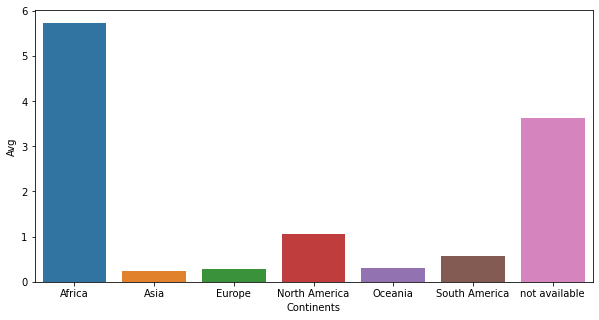

In [31]:
#Representation of highest average using bar plot visualisation by seaborn library
# df_highest_average = biggest_df_avg
import seaborn as sns


biggest_df_avg = dfb.groupby(['Continents']).mean()
biggest_df_avg['Avg'] = biggest_df_avg.max(axis=1)

ax = sns.barplot(x=biggest_df_avg.index,y="Avg",data=biggest_df_avg)
sns.set_context({"figure.figsize": (10, 5)})

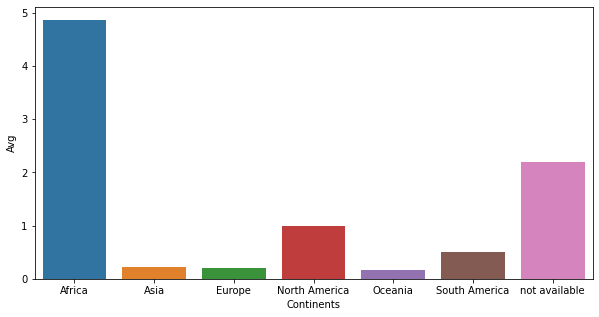

In [33]:
#Representation of lowest average using bar plot visualisation by seaborn library
#df_lowest_average = smallest_df_avg

smallest_df_avg = dfb.groupby(['Continents']).mean()
smallest_df_avg['Avg'] = smallest_df_avg.min(axis=1)

ax = sns.barplot(x=smallest_df_avg.index,y="Avg",data=smallest_df_avg)
sns.set_context({"figure.figsize": (10, 4)})

Text(0, 0.5, 'HIV Estimated Prevalence')

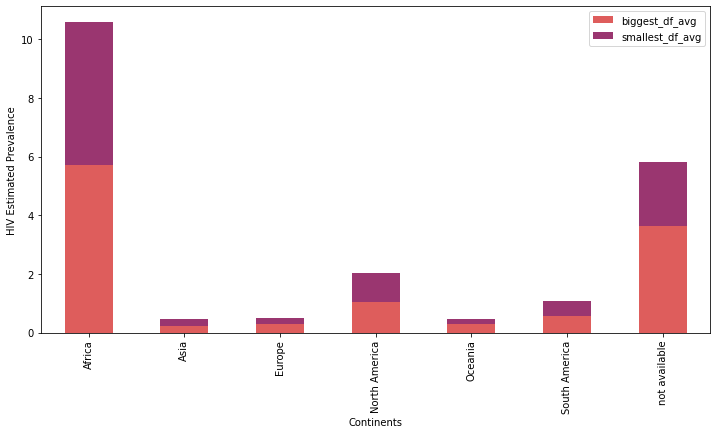

In [38]:
# Representation of lowest and highest average using bar plot visualisation by seaborn library
# df_min_max = biggest_smallest_df, cs_min_max = minimum_cs_maximum

import matplotlib.pyplot as pl
from matplotlib.colors import ListedColormap
biggest_smallest_df = dfb.groupby(['Continents']).mean()
biggest_smallest_df['biggest_df_avg'] = biggest_smallest_df.max(axis=1)
biggest_smallest_df['smallest_df_avg'] = biggest_smallest_df.min(axis=1)
minimum_cs_maximum = biggest_smallest_df[['biggest_df_avg','smallest_df_avg']]

minimum_cs_maximum.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("flare",2 )), 
          figsize=(12,6))

pl.ylabel('HIV Estimated Prevalence')

In [43]:
# new_df_continents = new_cont_df, cont_other = different_continents
new_df_continents = df.groupby('Continents', group_keys=False).apply(pd.DataFrame.sample, n=1)
different_continents = list(new_df_continents['Estimated HIV Prevalence% - (Ages 15-49)'])

while different_continents == max_continent_count or different_continents == min_continent_count:
    
    new_df_continents = df.groupby('Continents', group_keys=False).apply(pd.DataFrame.sample, n=1)
    different_continents = list(new_df_continents['Estimated HIV Prevalence% - (Ages 15-49)'])
different_continents

['South Sudan',
 'Brunei',
 'Liechtenstein',
 'Virgin Islands, British',
 'Northern Mariana Islands',
 'Suriname',
 'USSR']

In [45]:

new_df_continents = new_df_continents[['Estimated HIV Prevalence% - (Ages 15-49)', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 'Continents']]
new_df_continents['max_average'] = list(minimum_cs_maximum['biggest_df_avg'])
new_df_continents['min_average'] = list(minimum_cs_maximum['smallest_df_avg'])
new_df_continents.reset_index(drop=True)

,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,max_average,min_average
0,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,Africa,5.732000,4.865000
1,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,0.236667,0.213644
2,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,0.293529,0.193714
3,"Virgin Islands, British",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,1.052941,0.987500
4,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,0.300000,0.165000
5,Suriname,1.0,1.0,1.0,1.0,1.0,1.1,1.0,1.0,1.0,1.2,1.1,1.0,South America,0.563636,0.509091
6,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not available,3.620000,2.200000


Text(0.5, 0, '\nContinents')

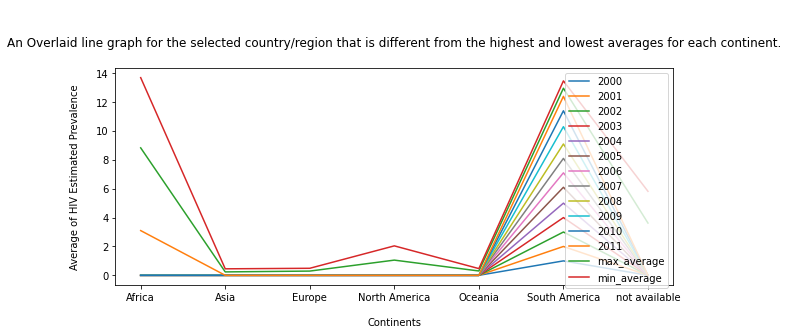

In [47]:
new_df_continents.plot(x='Continents', y=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,2009,2010,2011, 'max_average', 'min_average'], kind='line', stacked=True)
pl.title("\n\nAn Overlaid line graph for the selected country/region that is different from the highest and lowest averages for each continent.\n")
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nContinents')

Text(0.5, 0, '\nYear numbers')

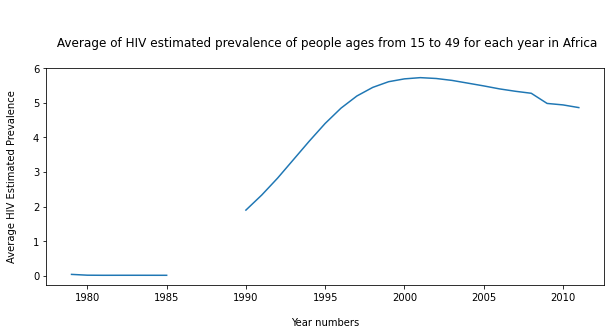

In [49]:

new_df_continents = df
new_df_continents = new_df_continents.groupby('Continents').mean()
new_df_continents.iloc[0].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Africa\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear numbers')

Text(0.5, 0, '\nYear number')

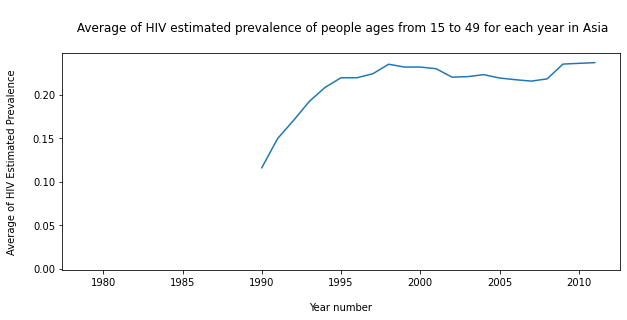

In [51]:
new_df_continents.iloc[1].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear number')

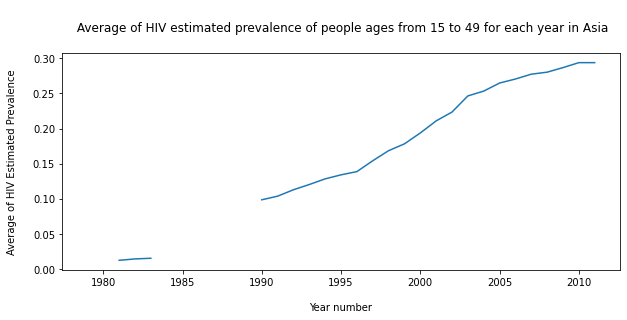

In [53]:
new_df_continents.iloc[2].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear number')

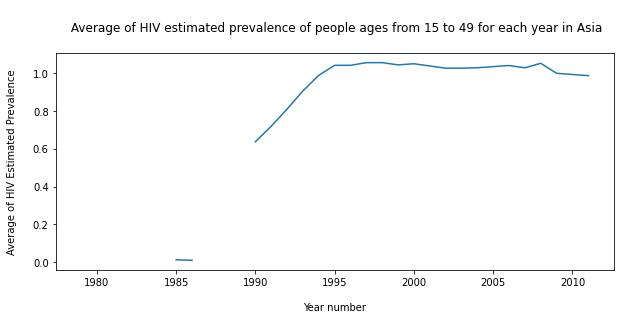

In [54]:
new_df_continents.iloc[3].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear number')

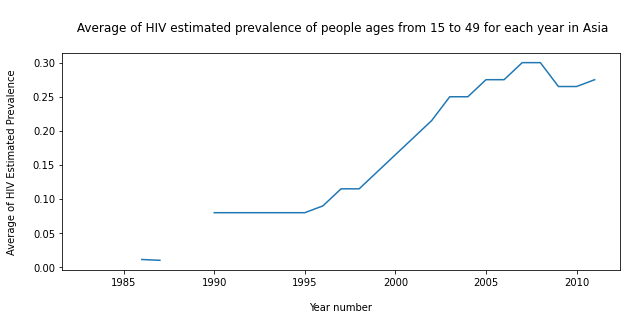

In [55]:
new_df_continents.iloc[4].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear number')

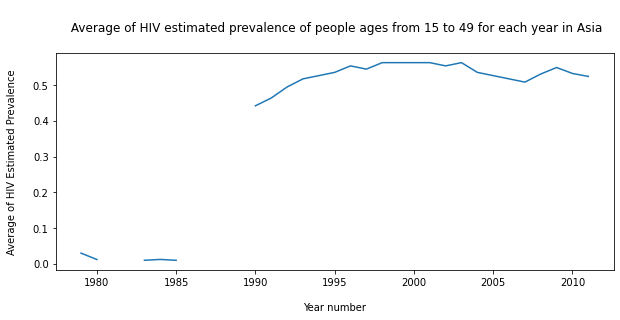

In [56]:
new_df_continents.iloc[5].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear number')

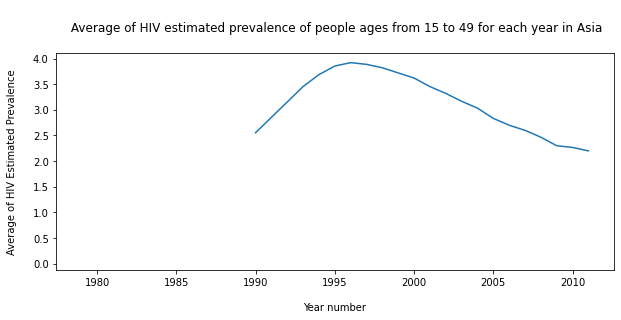

In [57]:
new_df_continents.iloc[6].plot(kind = 'line')
pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear number')

Text(0.5, 0, '\nYear numbers')

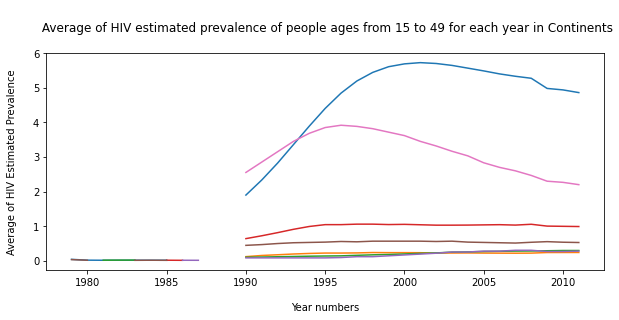

In [59]:
new_df_continents.iloc[0].plot(kind = 'line')
new_df_continents.iloc[1].plot(kind = 'line')
new_df_continents.iloc[2].plot(kind = 'line')
new_df_continents.iloc[3].plot(kind = 'line')
new_df_continents.iloc[4].plot(kind = 'line')
new_df_continents.iloc[5].plot(kind = 'line')
new_df_continents.iloc[6].plot(kind = 'line')


pl.title('\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Continents\n')
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nYear numbers')

Text(0.5, 0, '\nContinents')

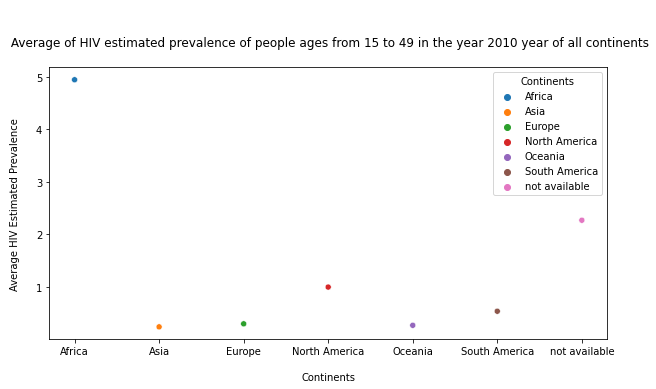

In [62]:
import seaborn as sns
dfa = new_df_continents[[2010]]
x_axis = []
y_axis = []
y_axis = dfa[2010].tolist()
x_axis = dfa.index

#Scatter plot 

pl.figure(figsize=(10,5))
#sns.scatterplot
pl.ylabel('Average HIV Estimated Prevalence\n')
sns.scatterplot(x=x_axis, y=y_axis,hue=dfa.index);
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 in the year 2010 year of all continents\n')
pl.xlabel('\nContinents')

Text(0.5, 0, '\nContinents')

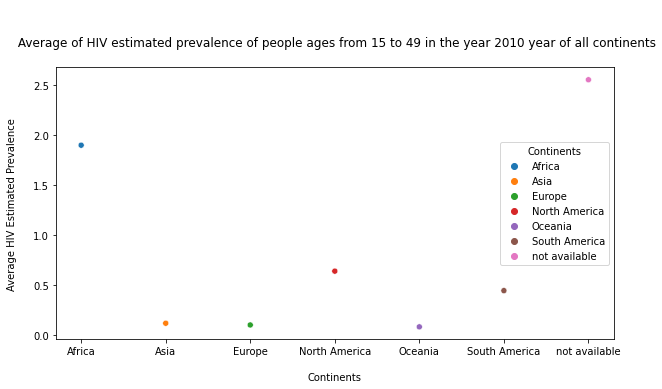

In [63]:
import seaborn as sns
dfa = new_df_continents[[1990]]
x_axis = []
y_axis = []
y_axis = dfa[1990].tolist()
x_axis = dfa.index

#Scatter plot 

pl.figure(figsize=(10,5))
#sns.scatterplot
pl.ylabel('Average HIV Estimated Prevalence\n')
sns.scatterplot(x=x_axis, y=y_axis,hue=dfa.index);
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 in the year 2010 year of all continents\n')
pl.xlabel('\nContinents')